Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise05/exercise05.ipynb)

# Exercise 5

## Problem

So far, we've been examining affordable housing in DC with summary tables. Some of you have figured out how to incorporate graphic variables into these tables, using color to highlight minimums and maximums (good Googling!). However, we can often communicate much more convincingly, and even see patterns better ourselves, by making charts.

For this week's exercise, please:

- Write a function that makes a plot communicating a valuable statistic about affordable housing in each ward. You get to choose what's most valuable to show.
- The function should take an argument to filter by project status so it can be used to generate a plot representing projects that are either completed, under construction, or in the pipeline. (The same generalized function should be able to represent projects with any status.)
    - Optional: Can you specify the argument so it's also easy to see data for projects with all three statuses at once?
    - Optional: The function may also take additional arguments for whatever customization you think would be valuable for an end-user.
- The function should be stored in a module, loaded into a notebook, and called at least once in the notebook to demonstrate it.
- Please make a pull request with a folder containing your module (`.py` file), notebook (`.ipynb` file), any CSV files your analysis depends on, and any additional graphics files.

Bonus: Make it even better by exporting one plot to Illustrator or another software and fine-tuning it. Then include it in your PR folder and use markdown to show the resulting graphic in your notebook. (Hint: I demonstrate how to do this with markdown in the demo05 notebook.)

## Data

CSVs for the affordable housing dataset and ward census data are included on GitHub at `exercises/exercise05`. Please feel free to draw on other datasets, though this is not required. If you do use other data, please cite them, preferably with links, with markdown in your notebook or through comments in your code.


In [1]:
# Import your module

# Call your main function

import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/woods/woods_05')

Mounted at /content/drive


In [ ]:
# make a module
# not sure how to do this, tried in last exercise and failed. going to out function here

In [2]:
def calc_affordable_housing_per_ward(status):

  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/Colab Notebooks/woods/woods_05/')

  affordable_housing = pd.read_csv('affordable_housing_05.csv')

  affordable_housing = affordable_housing[
        affordable_housing['STATUS_PUBLIC'].isin([status])]

  cols = [
        'AFFORDABLE_UNITS_AT_0_30_AMI',
        'AFFORDABLE_UNITS_AT_31_50_AMI',
        'AFFORDABLE_UNITS_AT_51_60_AMI',]

  affordable_housing['AFFORDABLE_UNITS_AT_0_60_AMI'] = affordable_housing[cols].sum(axis=1)
  affordable_housing_per_ward = affordable_housing.groupby('MAR_WARD').agg({
        'AFFORDABLE_UNITS_AT_0_60_AMI': 'sum'})

  affordable_housing_per_ward = affordable_housing_per_ward.reset_index()

  mar_ward = affordable_housing_per_ward['MAR_WARD']
  aff_0_60 = affordable_housing_per_ward['AFFORDABLE_UNITS_AT_0_60_AMI']

  frame = {
          'Ward': mar_ward,
          'Afforable Units Under 60 AMI': aff_0_60,
      }
  final_frame = pd.DataFrame(frame)


  return final_frame

In [3]:
unit_counts = calc_affordable_housing_per_ward('Pipeline')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt

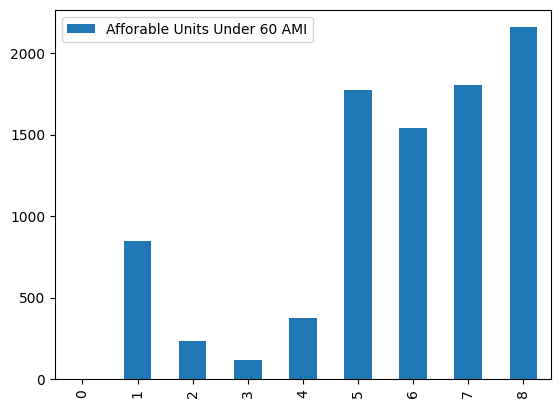

In [5]:
ax = unit_counts.plot.bar()
plt.show()